# Perceptron Algorithm for AND gate

In [1]:
# initialize weights and bias globally
w1, w2, b = 0.5, 0.5, -1
def activate(x):
    return 1 if x>=0 else 0

In [2]:
def train(inputs, outputs, lr, epochs):
    global w1, w2, b
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            A,B = inputs[i]
            target_output = outputs[i]
            output = activate(w1*A + w2*B + b)
            error = target_output - output
            w1+= lr*error*A
            w2+= lr*error*B
            b+= lr*error
            total_error += abs(error)
        if total_error == 0:
            break

In [9]:
# define inputs and desired outputs for AND gate
inputs = [(0,0),(0,1),(1,0),(1,1)]
desired_outputs = [0,0,0,1]
lr = 0.1
epochs = 100

In [10]:
train(inputs, desired_outputs, lr,epochs)
print("Input and Output for AND gate")
for i in range(len(inputs)):
    A,B = inputs[i]

    output = activate(w1*A + w2*B +b)
    print(f"Input: ({A}, {B}) Output: {output}")

Input and Output for AND gate
Input: (0, 0) Output: 0
Input: (0, 1) Output: 0
Input: (1, 0) Output: 0
Input: (1, 1) Output: 1


# OR gate

In [11]:
# define inputs and desired outputs for AND gate
inputs_or = [(0,0),(0,1),(1,0),(1,1)]
desired_outputs_or = [0,1,1,1]
lr_or = 0.1
epochs_or = 100

In [12]:
train(inputs_or, desired_outputs_or, lr_or,epochs_or)
print("Input and Output for OR gate")
for i in range(len(inputs)):
    A,B = inputs[i]

    output = activate(w1*A + w2*B +b)
    print(f"Input: ({A}, {B}) Output: {output}")

Input and Output for OR gate
Input: (0, 0) Output: 0
Input: (0, 1) Output: 1
Input: (1, 0) Output: 1
Input: (1, 1) Output: 1


# NAND gate

In [13]:
# define inputs and desired outputs for NAND gate
inputs_nand = [(0,0),(0,1),(1,0),(1,1)]
desired_outputs_nand = [1,1,1,0]
lr_nand = 0.1
epochs_nand = 100

In [14]:
train(inputs_nand, desired_outputs_nand, lr_nand,epochs_nand)
print("Input and Output for NAND gate")
for i in range(len(inputs)):
    A,B = inputs[i]

    output = activate(w1*A + w2*B +b)
    print(f"Input: ({A}, {B}) Output: {output}")

Input and Output for NAND gate
Input: (0, 0) Output: 1
Input: (0, 1) Output: 1
Input: (1, 0) Output: 1
Input: (1, 1) Output: 0


# NOR gate

In [17]:
# define inputs and desired outputs for NAND gate
inputs_nor = [(0,0),(0,1),(1,0),(1,1)]
desired_outputs_nor = [1,0,0,0]
lr_nor = 0.1
epochs_nor = 100

In [18]:
train(inputs_nor, desired_outputs_nor, lr_nor,epochs_nor)
print("Input and Output for NOR gate")
for i in range(len(inputs)):
    A,B = inputs[i]

    output = activate(w1*A + w2*B +b)
    print(f"Input: ({A}, {B}) Output: {output}")

Input and Output for NOR gate
Input: (0, 0) Output: 1
Input: (0, 1) Output: 0
Input: (1, 0) Output: 0
Input: (1, 1) Output: 0


# XOR gate

The output above doesn't match with the expected outputs as a single-layer perceptron cannot solve the XOR problem. The XOR function is not linearly separable, which means a simple perceptron (a single-layer neural network) cannot find a linear decision boundary that separates the two classes.

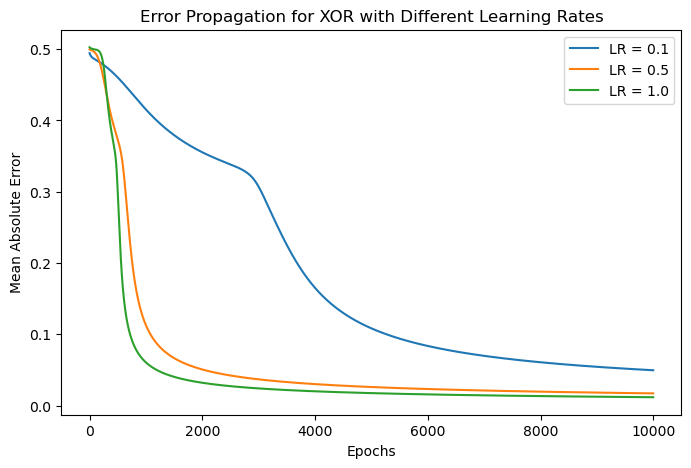

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]) 

input_size, hidden_size, output_size = 2, 2, 1
epochs = 10000
learning_rates = [0.1, 0.5, 1.0]  # different learning rates

plt.figure(figsize=(8, 5))

for lr in learning_rates:
    w1 = np.random.randn(input_size, hidden_size)
    w2 = np.random.randn(hidden_size, output_size)
    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))

    errors = []

    for epoch in range(epochs):
        hidden_input = np.dot(X, w1) + b1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, w2) + b2
        final_output = sigmoid(final_input)

        # compute error
        error = y - final_output
        errors.append(np.mean(np.abs(error)))

        # backpropagation
        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(w2.T) * sigmoid_derivative(hidden_output)

        # update weights and biases
        w2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr
        w1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    plt.plot(errors, label=f"LR = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Error Propagation for XOR with Different Learning Rates")
plt.legend()
plt.show()